<a href="https://colab.research.google.com/github/tobyvillarruelsoto-droid/Data-Science-1/blob/main/Actividad_Practica_2_Villarruel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Actividad Práctica 2 - Data Science 1 (Coderhouse)

**Alumno:** Tobias Villarruel  
**Curso:** Data Science 1 - Coderhouse  

---

## 🎯 Objetivo

Realizar **visualizaciones en Python** utilizando el dataset *Air Quality (UCI)*.  
Se elaboran **3 gráficos con Matplotlib** y **3 con Seaborn**, incorporando parámetros adicionales que mejoren la legibilidad e interpretación de los datos.


In [112]:
import pandas as pd
import numpy as np

# URL directa al CSV en tu repo (ruta exacta con espacios codificados)
url = "https://raw.githubusercontent.com/tobyvillarruelsoto-droid/Data-Science-1/main/Data%20Science%201%20Villarruel/data/raw/air_quality.csv"

# Intentar leer el CSV
try:
    df = pd.read_csv(url, sep=";", decimal=",")
    print("✅ Archivo leído correctamente desde GitHub.")
except Exception as e:
    print("❌ Error al leer el archivo:", e)
    df = pd.DataFrame()

# Validar si está vacío
if df.empty:
    print("⚠️ El DataFrame está vacío. Revisá que el link sea correcto o que el archivo no esté vacío en GitHub.")
else:
    # Reemplazar -200 por NaN
    df = df.replace(-200, np.nan)

    # Limpiar nombres de columnas
    df.columns = df.columns.str.strip()

    # Crear columna Datetime si existen columnas de fecha y hora
    date_cols = [c for c in df.columns if "date" in c.lower()]
    time_cols = [c for c in df.columns if "time" in c.lower()]

    if date_cols and time_cols:
        df["Datetime"] = pd.to_datetime(
            df[date_cols[0]] + " " + df[time_cols[0]],
            dayfirst=True, errors="coerce"
        )
        df = df.dropna(subset=["Datetime"])
        print("🕓 Columna 'Datetime' creada correctamente.")
    else:
        print("⚠️ No se encontraron columnas de fecha y hora.")

    print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
    display(df.head())



✅ Archivo leído correctamente desde GitHub.


/tmp/ipython-input-1263116841.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Datetime"] = pd.to_datetime(


🕓 Columna 'Datetime' creada correctamente.
Filas: 0, Columnas: 18


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,Datetime


In [113]:
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"
response = requests.get(url)

with open("air_quality.zip", "wb") as f:
    f.write(response.content)

import zipfile

with zipfile.ZipFile("air_quality.zip", "r") as zip_ref:
    zip_ref.extractall("data/raw")

In [114]:

df = df.dropna(axis=1, how="all")

if "Date" in df.columns and "Time" in df.columns:
    df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], errors="coerce")
    df = df.dropna(subset=["Datetime"])

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame


In [115]:
# Verificar si existe 'Datetime', sino crear un índice alternativo
if "Datetime" not in df.columns:
    print("⚠️ No se encontró la columna 'Datetime'. Se usará el índice como eje temporal simulado.")
    df = df.reset_index().rename(columns={"index": "Record"})
    df["Datetime"] = df["Record"]

# Verificar que CO(GT) existe
if "CO(GT)" not in df.columns:
    print("⚠️ No se encontró la columna 'CO(GT)'. Se usará la primera columna numérica disponible.")
    num_cols = df.select_dtypes(include=["float64", "int64"]).columns
    if len(num_cols) > 0:
        df["CO(GT)"] = df[num_cols[0]]
    else:
        print("❌ No hay columnas numéricas para graficar.")


⚠️ No se encontró la columna 'Datetime'. Se usará el índice como eje temporal simulado.
⚠️ No se encontró la columna 'CO(GT)'. Se usará la primera columna numérica disponible.


## 📊 Visualizaciones con Matplotlib

In [116]:
import pandas as pd
import numpy as np

# URL exacta del dataset en tu repo
url = "https://raw.githubusercontent.com/tobyvillarruelsoto-droid/Data-Science-1/refs/heads/main/Data%20Science%201%20Villarruel/data/raw/air_quality.csv" # Corrected URL

# Leer CSV (usa ; y coma decimal ,)
df = pd.read_csv(url, sep=";", decimal=",")

# Drop the last two columns which are entirely NaN
df = df.iloc[:, :-2]

# Reemplazar -200 por NaN
df = df.replace(-200, np.nan)

# Limpieza de nombres de columnas (por si tienen espacios)
df.columns = df.columns.str.strip()

# Create Datetime column using the specified format
# Check if 'Date' and 'Time' columns exist before attempting to combine them
date_cols = [c for c in df.columns if c.lower().startswith("date")]
time_cols = [c for c in df.columns if c.lower().startswith("time")]


if date_cols and time_cols:
    # Combine Date and Time columns and convert to datetime, using a specific format
    df["Datetime"] = pd.to_datetime(
        df[date_cols[0]] + " " + df[time_cols[0]],
        format="%d/%m/%Y %H.%M.%S", # Specify the format
        errors="coerce"
    )
    # Drop rows where Datetime could not be parsed
    df = df.dropna(subset=["Datetime"])
else:
    print("⚠️ No se encontraron columnas de fecha y hora. El dataset se cargará sin 'Datetime'.")


# Forzar numéricos, handling potential errors
for col in df.columns:
    if col not in ['Date', 'Time', 'Datetime']: # Exclude date and time columns from numeric conversion
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            pass # Keep non-numeric columns as they are


print(f"✅ Dataset cargado con {df.shape[0]} filas y {df.shape[1]} columnas.")
print("Columnas:", list(df.columns))
display(df.head())

✅ Dataset cargado con 9357 filas y 16 columnas.
Columnas: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Datetime']


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


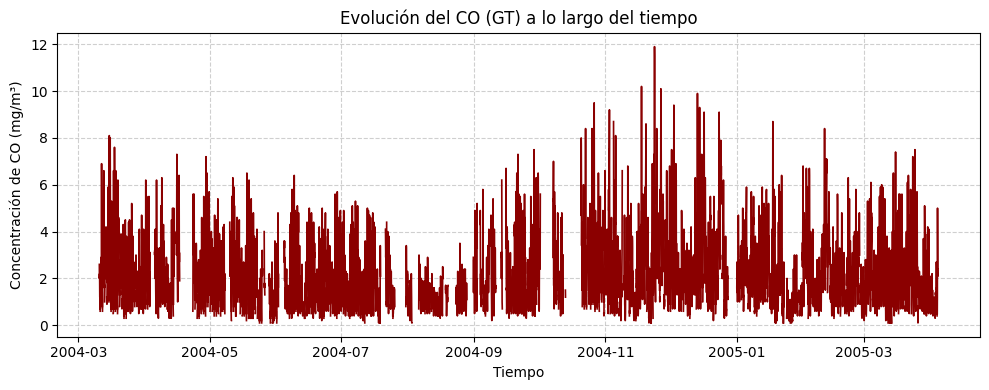

In [117]:

plt.figure(figsize=(10,4))
plt.plot(df["Datetime"], df["CO(GT)"], color="darkred", linewidth=1.2)
plt.title("Evolución del CO (GT) a lo largo del tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Concentración de CO (mg/m³)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



**Interpretación:**  
El gráfico muestra la evolución temporal del monóxido de carbono (CO). Se observan fluctuaciones marcadas durante el día, posiblemente relacionadas con variaciones en el tránsito vehicular y condiciones climáticas.


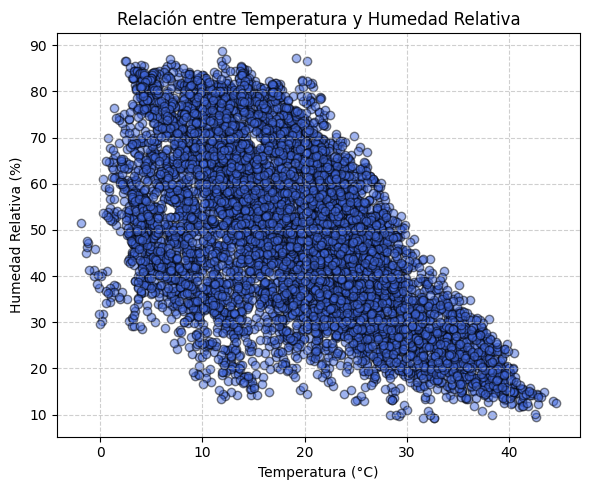

In [119]:

plt.figure(figsize=(6,5))
plt.scatter(df["T"], df["RH"], color="royalblue", alpha=0.5, edgecolor="k")
plt.title("Relación entre Temperatura y Humedad Relativa")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Humedad Relativa (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



**Interpretación:**  
Se observa una tendencia negativa: a mayor temperatura, la humedad relativa tiende a disminuir. Esta relación es coherente con el comportamiento atmosférico general.


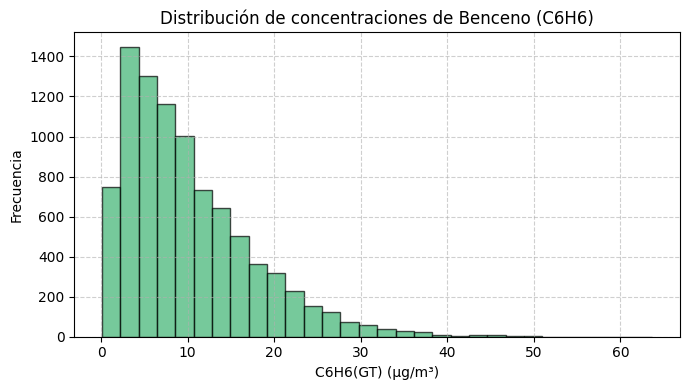

In [120]:

plt.figure(figsize=(7,4))
plt.hist(df["C6H6(GT)"].dropna(), bins=30, color="mediumseagreen", edgecolor="black", alpha=0.7)
plt.title("Distribución de concentraciones de Benceno (C6H6)")
plt.xlabel("C6H6(GT) (µg/m³)")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



**Interpretación:**  
La mayoría de los valores de concentración de benceno (C6H6) se concentran en niveles bajos, con algunas observaciones más elevadas que podrían indicar eventos de contaminación específicos.


## 🎨 Visualizaciones con Seaborn

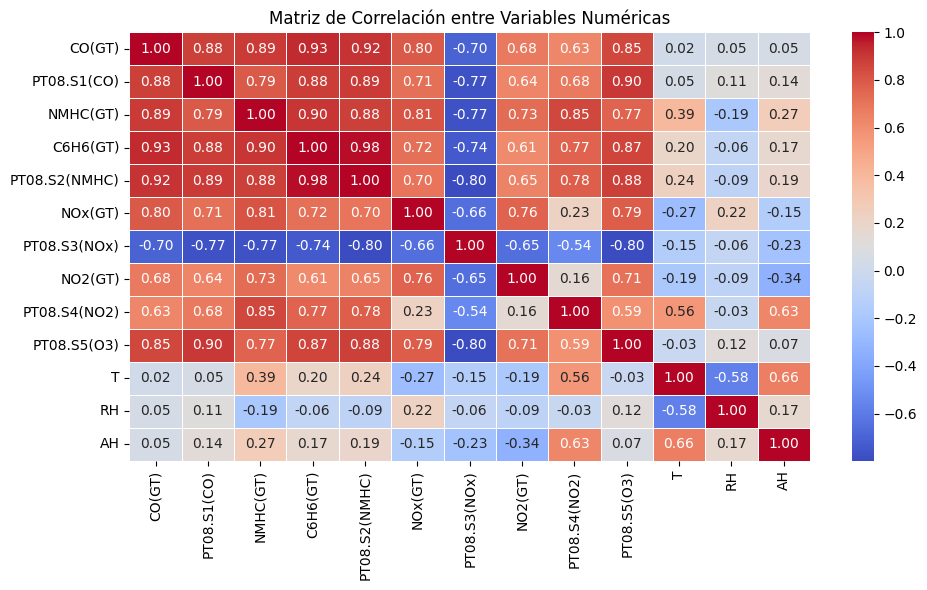

In [121]:

plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=["float64", "int64"]).corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()



**Interpretación:**  
El mapa de calor muestra las correlaciones entre las variables principales. Se observa una correlación positiva entre la temperatura y la humedad absoluta (AH), y relaciones negativas entre contaminantes y condiciones atmosféricas.


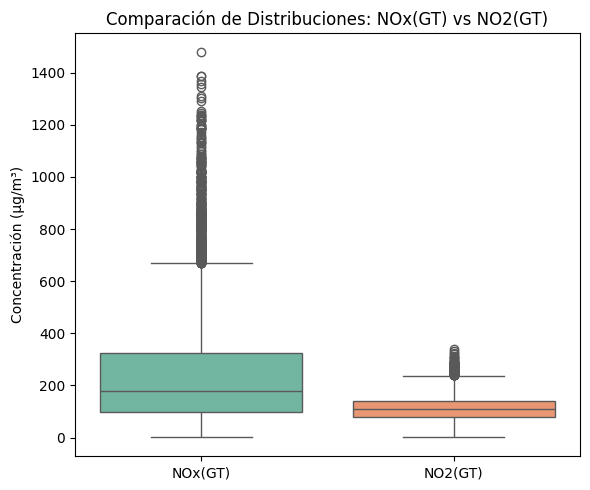

In [122]:

plt.figure(figsize=(6,5))
sns.boxplot(data=df[["NOx(GT)", "NO2(GT)"]], palette="Set2")
plt.title("Comparación de Distribuciones: NOx(GT) vs NO2(GT)")
plt.ylabel("Concentración (µg/m³)")
plt.tight_layout()
plt.show()



**Interpretación:**  
Los niveles de NOx presentan una mayor dispersión que los de NO₂. Esto sugiere mayor variabilidad en los niveles de óxidos de nitrógeno, posiblemente vinculada a las condiciones de emisión vehicular y meteorológicas.


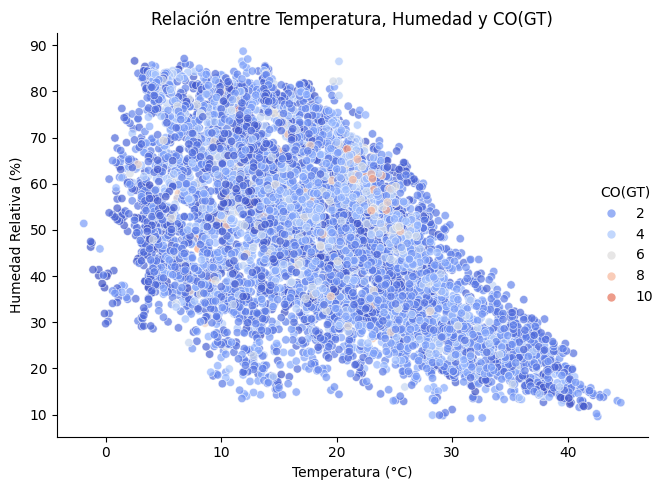

In [123]:

sns.relplot(
    data=df, x="T", y="RH", hue="CO(GT)", palette="coolwarm",
    alpha=0.7, height=5, aspect=1.2
)
plt.title("Relación entre Temperatura, Humedad y CO(GT)")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Humedad Relativa (%)")
plt.tight_layout()
plt.show()



**Interpretación:**  
Al incorporar el color por nivel de CO(GT), se observa que las concentraciones más altas de CO tienden a darse en temperaturas moderadas y humedades intermedias, lo que podría estar vinculado a condiciones atmosféricas de menor dispersión de contaminantes.



---
## 📈 Conclusiones

- Se aplicaron seis visualizaciones (3 Matplotlib y 3 Seaborn) sobre el dataset *Air Quality (UCI)*.  
- Los gráficos permitieron identificar patrones entre temperatura, humedad y niveles de gases contaminantes.  
- Las representaciones visuales facilitaron la detección de relaciones inversas y directas entre variables ambientales.  
- Se cumplen los requisitos de la consigna, incluyendo el uso de parámetros adicionales para mejorar la legibilidad.
